#### Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

#### Loading the Dataset

In [2]:
data = pd.read_csv(r"D:\ICTAK\Assignments and Case Studies\Case Study 02\car_age_price.csv")

#### Displaying the head of the dataset

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


#### Getting the shape of the dataset

In [4]:
data.shape

(112, 2)

#### Getting the info of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


###### <font color = violet> We can see that there is 2 columns in the dataset which are both int datatypes and have no null values in them.

#### Getting statistical summary of the dataset

In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


#### Getting the value counts of the column 'Year'

In [7]:
data.Year.value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

#### Visualizing the distribution of the column 'Year'

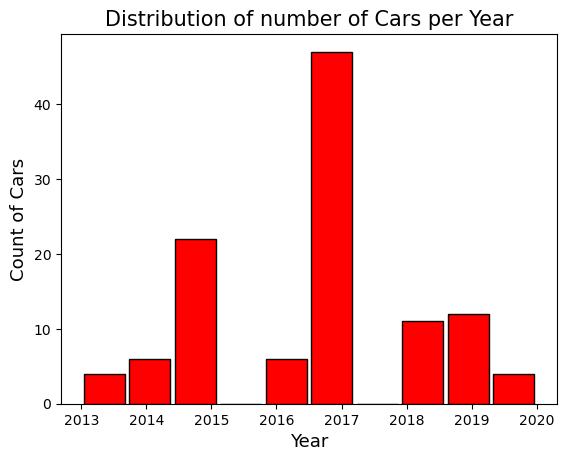

In [8]:
plt.hist(data['Year'], color = 'r', rwidth = 0.9, edgecolor = 'black')
plt.title('Distribution of number of Cars per Year', fontsize = 15)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Count of Cars', fontsize = 13)
plt.show()

#### Finding outliers in the columns of the dataset using boxplot

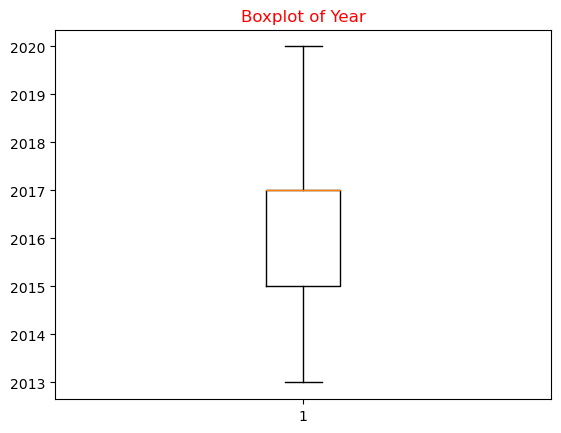

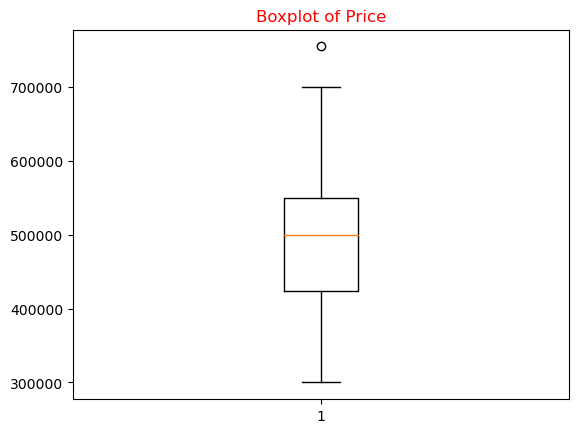

In [9]:
for col in data.columns:
    plt.figure()
    plt.boxplot(data[col])
    plt.title('Boxplot of {}'.format(col), color = 'r')
    plt.show()

###### <font color = violet> Since there is only one outlier in the column 'Price', we are accounting it.

#### Find the correlation between the columns in the dataset

In [10]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


#### Setting feature variable and taget variable

In [11]:
x = data.drop(['Price'], axis = 1).values        # feature variable
y = data['Price']                                # target variable

## <font color = brown> Linear Regression

#### Importing Linear Regression from sklearn

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#### Importing train_test_split, mean absolute error and r-squared error

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

#### Finding the best Linear Model

In [14]:
r_lr = 0
for i in range(100000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)
    model = lr.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    if r2_score(y_test, y_pred)>r_lr:
        r_lr = r2_score(y_test, y_pred)
        mae_lr = mean_absolute_error(y_test, y_pred)
        modelpredict_lr = model.predict([[2022]])
print('R-Square value =', r_lr)
print('Mean Absolute Error =', mae_lr)
print('The predicted value from linear regression model for the year 2022 is', modelpredict_lr[0])

R-Square value = 0.857424569175707
Mean Absolute Error = 23411.722574187177
The predicted value from linear model for the year 2022 is 714096.9875919074


## <font color = brown> Lasso Regression

#### Importing Lasso regresssion from sklearn

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0)

#### Finding the best Lasso Model 

In [17]:
r_ls = 0
for i in range(100000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)
    model = lasso.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    if r2_score(y_test, y_pred)>r_ls:
        r_ls = r2_score(y_test, y_pred)
        mae_ls = mean_absolute_error(y_test, y_pred)
        modelpredict_ls = model.predict([[2022]])
print('R-Square value =', r_ls)
print('Mean Absolute Error =', mae_ls)
print('The predicted value from lasso regression model for the year 2022 is', modelpredict_ls[0])

R-Square value = 0.8574249289551839
Mean Absolute Error = 23411.574366464145
The predicted value from lasso regression model for the year 2022 is 714094.9223345518


#### <font color = brown> We can see that the r-squared value for linear regression and lasso regression best models are about the same(lasso regression model is slightly high) and the predicted price of a 2022 model second-hand grand i10 is about the same in both regression models. So we can take either of the models for our prediction.